# Neural Networks Project - Credit Risks Analysis

An experimental study about a neural network model aplication in a real world problem.

Neural Networks - Minister by Germano Vasconcelos

Team:  
- Lucas Alves Rufno  
- Rodrigo de Lima Oliveira  
- Ullayne Fernandes Farias de Lima 
- Vitor Jose da Silva Lima

## Imports:

In [1]:
from sklearn.neighbors import KDTree
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import pandas as pd

## Read and view dataset:
Read file as .csv in Pandas with 'tab' as separator and describe data partially.

In [2]:
ds = pd.read_csv("datasets/original/TRN", sep='\t')
ds.describe()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
count,389196.00000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,3.891960e+05,389196.000000,...,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000
mean,194597.50000,0.889274,0.691952,0.476552,0.296195,0.241179,0.218011,0.186836,4.552049e-01,0.521514,...,0.423378,0.417540,0.425708,0.459820,0.440842,0.436896,0.433709,0.440339,0.655449,0.344551
std,112351.35202,0.313793,0.461687,0.499451,0.456579,0.427799,0.412895,0.389781,2.537459e-01,0.499538,...,0.494095,0.493154,0.494451,0.498384,0.496489,0.496002,0.495587,0.496428,0.475222,0.475222
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.506237e-16,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97298.75000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.507866e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,194597.50000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375241e-01,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,291896.25000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.578835e-01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,389195.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Clean dataset:
Removing the column "INDEX" and "IND_BOM_1_2", they are irrelevant to solve problem

In [3]:
ds.drop(['INDEX', 'IND_BOM_1_2'], axis=1, inplace=True)
ds[:5]

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1
0,1,1,1,0,0,0,0,0.135098,1,0.222222,...,0,0,0,1,1,0,1,1,1,0
1,1,0,1,0,0,1,0,0.273504,1,0.111111,...,0,0,1,0,1,1,0,0,0,1
2,1,0,1,0,0,1,0,0.281910,0,1.000000,...,0,1,1,0,0,0,0,1,0,1
3,1,1,1,0,0,0,0,0.225741,0,0.111111,...,0,1,1,0,1,1,0,1,0,1
4,1,1,0,0,0,1,0,0.480403,0,0.111111,...,1,1,1,1,0,0,1,0,1,1


## Stratify dataset:
Separate dataset according to classes in "IND_BOM_1_1".

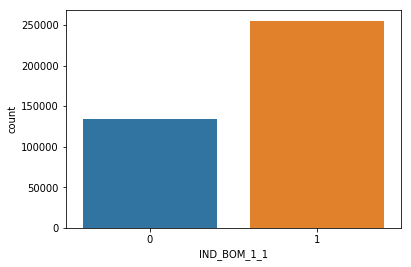

In [4]:
ds0 = ds[ds['IND_BOM_1_1'] <  0.5]
ds1 = ds[ds['IND_BOM_1_1'] >= 0.5]

sns.countplot('IND_BOM_1_1', data=ds)

## Split dataset:

Separate the stratified dataset in three sets:
- **Train**: 50%
- **Validation**: 25%
- **Test**: 25%

In [5]:
def splitter(df):
    df = shuffle(df)
    
    r1 = int(df.shape[0] * 0.25)
    r2 = int(df.shape[0] * 0.25) + r1
    
    return df[:r1], df[r1:r2], df[r2:]

te0, va0, tr0 = splitter(ds0)
te1, va1, tr1 = splitter(ds1)

## Oversampling the minority class:

Technique to balance sets according to the size of majority class using repetition or SMOTE.

In [6]:
def repeat(df1, df2):
    tlg = False
    if df1.shape[0] > df2.shape[0]:
        aux = df1
        df1 = df2
        df2 = aux
        tgl = True
    aux = []
    while(len(aux) + df1.shape[0] != df2.shape[0]):
        num = rnd.randrange(df1.shape[0])
        row = df1.iloc[num]
        aux.append(row)
    if len(aux) != 0:
        df1 = df1.append(aux, ignore_index=True)
    if tlg:
        return df2, df1
    else:
        return df1, df2

tr0, tr1 = repeat(tr0, tr1)
va0, va1 = repeat(va0, va1)

In [6]:
def calc(x, y):
    p = rnd.random()
    if float(int(x)) == x and float(int(y)) == y:
        if p > 0.5:
            return y
        else:
            return x
    else:
        return x + (y - x)*p

def smote(df1, df2, k):
    tlg = False
    if df1.shape[0] > df2.shape[0]:
        aux = df1
        df1 = df2
        df2 = aux
        tgl = True
    aux = []
    kdt = KDTree(df1)
    while(len(aux) + df1.shape[0] != df2.shape[0]):
        num1 = rnd.randrange(df1.shape[0])
        row1 = df1.iloc[num1]
        nAux = rnd.randrange(2, k)
        num2 = kdt.query([row1], k=nAux, return_distance=False)[0][-1]
        row2 = df1.iloc[num2]
        row = list(map(calc, row1, row2))
        aux.append(row)
    if len(aux) != 0:
        df1 = df1.append(aux, ignore_index=True)
    if tlg:
        return df2, df1
    else:
        return df1, df2

print("Initial values:")
print("\tValidation: " + str(va0.shape[0]) + "/" + str(va1.shape[0]))
print("\tTrain: " + str(tr0.shape[0]) + "/" + str(tr1.shape[0]))
va0, va1 = smote(va0, va1, 3)
tr0, tr1 = smote(tr0, tr1, 3)
print("Final values (After SMOTE):")
print("\tValidation: " + str(va0.shape[0]) + "/" + str(va1.shape[0]))
print("\tTrain: " + str(tr0.shape[0]) + "/" + str(tr1.shape[0]))

Initial values:
	Validation: 33524/63774
	Train: 67050/127550


/home/lucas/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


Final values (After SMOTE):
	Validation: 63774/63774
	Train: 127550/127550


## Regrouping and shuffling dataset

Grouping in finals sets of data and randomizing instances in each set

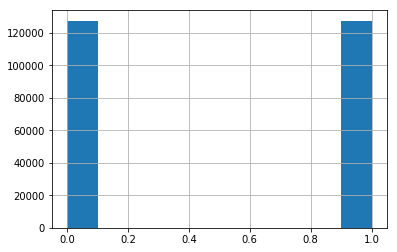

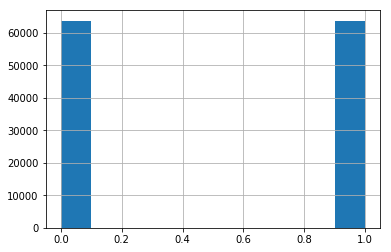

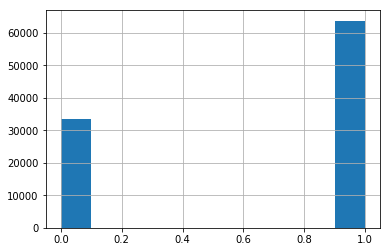

In [7]:
tr = tr0.append(tr1, ignore_index=True)
va = va0.append(va1, ignore_index=True)
te = te0.append(te1, ignore_index=True)

tr = shuffle(tr)
va = shuffle(va)
te = shuffle(te)

tr['IND_BOM_1_1'].hist().plot()
plt.show()
va['IND_BOM_1_1'].hist().plot()
plt.show()
te['IND_BOM_1_1'].hist().plot()
plt.show()

## Saving dataset:

Saving new dataset as .csv in datasets folder.

In [9]:
tr.to_csv("datasets/processed/Train.csv")
va.to_csv("datasets/processed/Validation.csv")
te.to_csv("datasets/processed/Test.csv")